<a href="https://colab.research.google.com/github/aniketmishr/ml-tutorial/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:

mnist = keras.datasets.mnist
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

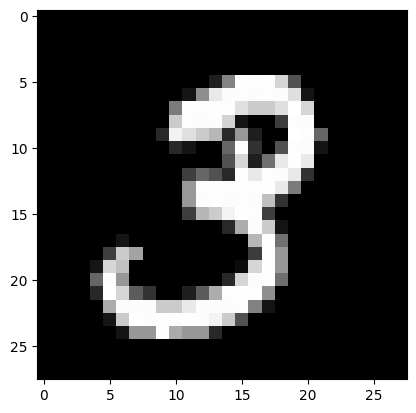

In [29]:
plt.imshow(X_train[1],cmap = "gray")

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [7]:
model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.5733 - accuracy: 0.8534 - val_loss: 0.3005 - val_accuracy: 0.9152
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2809 - accuracy: 0.9198 - val_loss: 0.2360 - val_accuracy: 0.9342
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2289 - accuracy: 0.9351 - val_loss: 0.2029 - val_accuracy: 0.9434
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1950 - accuracy: 0.9447 - val_loss: 0.1706 - val_accuracy: 0.9548
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1697 - accuracy: 0.9514 - val_loss: 0.1572 - val_accuracy: 0.9576
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1503 - accuracy: 0.9566 - val_loss: 0.1438 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1343 - accuracy: 0.9612 - val_loss: 0.1306 - val_accuracy:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.9785


[0.06981052458286285, 0.9785000085830688]

In [19]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6])

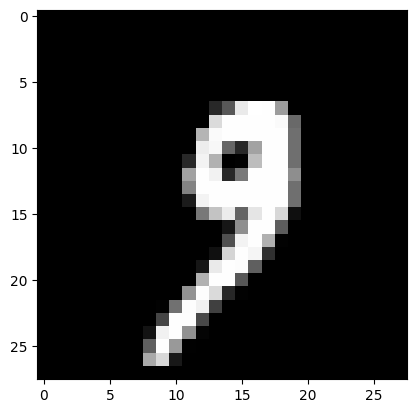

In [26]:
example = 1000
plt.imshow(X_test[example],cmap = "gray")

In [27]:
print("Predited Value: ", y_classes[example])

Predited Value:  9
